# Pengolahan Citra Digital - Bagian 2


Yang bakal dibahas pada *notebook* ini:
1. Rotasi
2. Translasi
3. *Resize*
4. *flipping* (Pencerminan)

Catatan tambahan, ada beberapa yang saya coba terangkan dalam bentuk *code* saya sendiri.

## 1. Rotasi

*TL:DR* Muterin citra. Buat rotasi pake fungsi yang udah tersedia dari openCV yaitu 
```
cv2.getRotationMatrix2D((posisi_tengah_x, posisi_tengah_y), angle,1)
```
dan
```
cv2.warpAffine(citra, rotasi, dimensi)
```

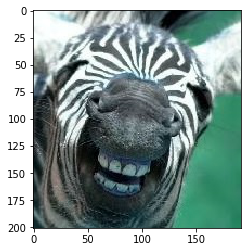

In [7]:
# Cek lagi notebook sebelum ini ya
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

# Oh iya saya bakal pake gambar andalan saya lah!
img = cv2.imread("Asset/gambar.jpg")
plt.imshow(img)
plt.show()

(201, 192, 3)
[[  0.68199836  -0.7313537   93.85315197]
 [  0.7313537    0.68199836 -14.84747209]]


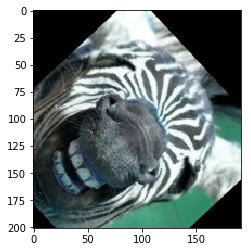

In [5]:
print(img.shape) # 3 nilai: sumbu y, sumbu x, channel
baris, kolom = img.shape[:2]

_rot = cv2.getRotationMatrix2D((kolom/3, baris/2), -47,1)
print(_rot)
img_rot_90 = cv2.warpAffine(img,_rot,(kolom,baris))
plt.imshow(img_rot_90)

Versi bener dari [link](https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/)


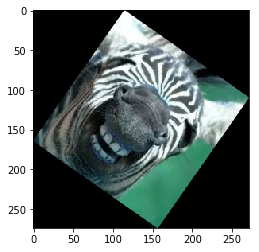

In [3]:
import numpy as np
def rotate_bound(image, angle):
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)

    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
 
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
 
    return cv2.warpAffine(image, M, (nW, nH))

x = rotate_bound(img, 35)
plt.imshow(x)

## 2. Translasi
*Tl:DR* geser citra (*ingetkan pas pelajaran matematika yang geser-geser sumbu). *First* buat dulu matriks transformasinya,

```python
_geser = np.float32([[1,0, titik_geser_x], [0,1,titik_geser_y]])
```

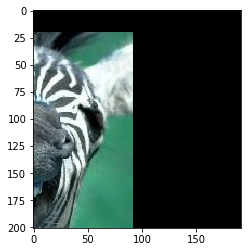

In [10]:
_geser = np.float32([[1,0, -100], [0,1, 20]])
img_translasi = cv2.warpAffine(img,_geser,(kolom,baris))
plt.imshow(img_translasi)

## 3. *Resize*
*Tl:DR* Besar atau *kecilin* citra
```python
cv2.resize(citra, (dimensi))
```

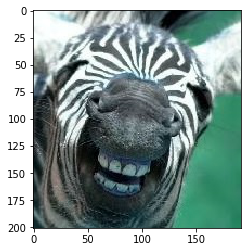

In [5]:
plt.imshow(img)

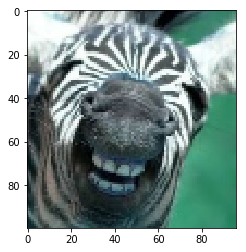

In [12]:
img_resize = cv2.resize(img, (int(kolom/2), int(baris/2)))
plt.imshow(img_resize)
# Tidak muncul ada perubahan, hanya terjadi downsampling
# silahkan coba pakai cv2.imshow(img_resize)

## 4. *flipping*
*Tl:DR* Pencerminan, *kek* citranya itu dibalik.

```python
cv2.flip(citra, parameter)
```
parameter
- 0 = dibalik secara horizontal
- 1 = dibalik secara vertical
- -1 = dibalik secara vertical dan horizontal

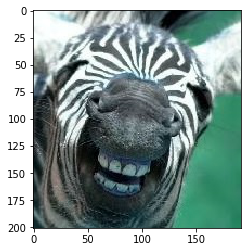

In [19]:
img_flip_hor = cv2.flip(img, 0)
img_flip_ver = cv2.flip(img, 1)
img_flip_both = cv2.flip(img, -1)
img_flip_flip_hor = cv2.flip(img_flip_both, 0)
img_flip_flip_flip_ver = cv2.flip(img_flip_flip_hor, 1)

# plt.imshow(img_flip_hor)
# plt.imshow(img_flip_ver)
# plt.imshow(img_flip_both)
# plt.imshow(img_flip_flip_hor)
plt.imshow(img_flip_flip_flip_ver)

## Bonus: *Padding*

*padding* adalah sebuah fungsi untuk menambahkan *border* pada citra. Berikut adalah contoh *code* yang saya coba buat sendiri

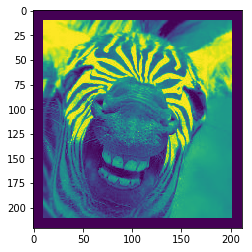

In [8]:
def add_image_padding(image, iterasi=1):
    temp = image.copy()

    for i in range(0, int(iterasi)):
        if i == 0:
            zero_padding_row = np.zeros(image.shape[0])
        else:
            zero_padding_row = np.zeros(temp.shape[0])
        temp = np.insert(temp, temp.shape[1], zero_padding_row, axis=1)
        temp = np.insert(temp, 0, zero_padding_row, axis=1)
        zero_padding_column = np.zeros(temp.shape[1])
        temp = np.insert(temp, temp.shape[0], zero_padding_column, axis=0)
        temp = np.insert(temp, 0, zero_padding_column, axis=0)
    return temp


img_padding = add_image_padding(img[:,:,1], 10)
plt.imshow(img_padding)